In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
###EDA
#structure of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
sum(data.isnull().any())
#checking for null values if any 

0

In [5]:
data.isnull().values.any()

False

In [6]:
#how many fraud and correct
classes=data['Class'].value_counts()
print(classes)
legit=classes[0]
fraud=classes[1]
print('legit cases:',legit,"\nfraud cases:",fraud)

0    284315
1       492
Name: Class, dtype: int64
legit cases: 284315 
fraud cases: 492


In [7]:
print(data['Class']==0)
data[data['Class']==0]

0         True
1         True
2         True
3         True
4         True
          ... 
284802    True
284803    True
284804    True
284805    True
284806    True
Name: Class, Length: 284807, dtype: bool


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


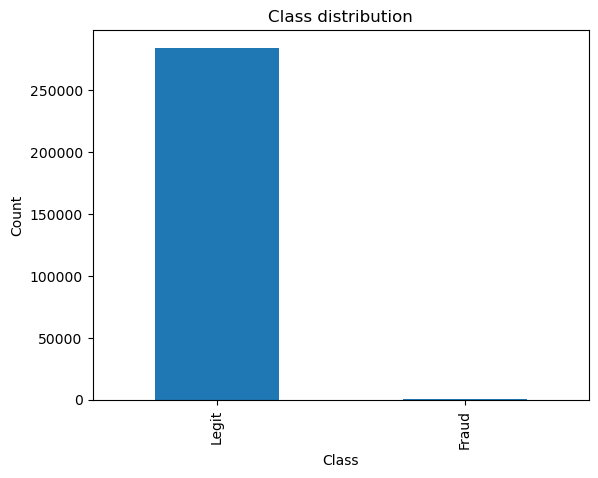

In [8]:
classes.plot.bar()
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class distribution')
plt.xticks(ticks=[0, 1], labels=['Legit', 'Fraud'])
plt.show()

#shows imbalanced data legit data is a lot more than fraud

In [9]:
#have to analyse transaction data of both classes , if you see the legit data summary is more higher and deviated than fraud data
print("for legit data, amount summary:")
print(data[data['Class']==0].Amount.describe())
print("for fraud data, amount summary:")
print(data[data['Class']==1].Amount.describe())

for legit data, amount summary:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
for fraud data, amount summary:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


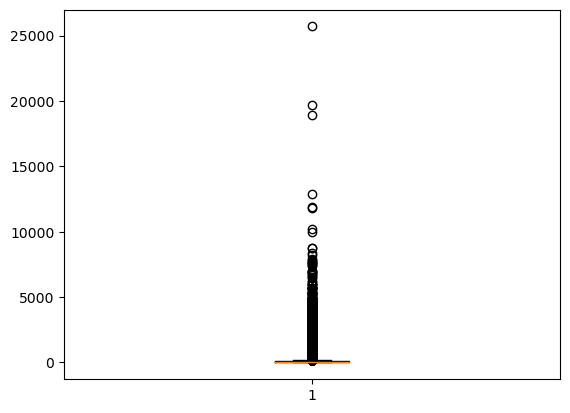

In [10]:
plt.boxplot(data[data['Class']==0].Amount)
plt.show()

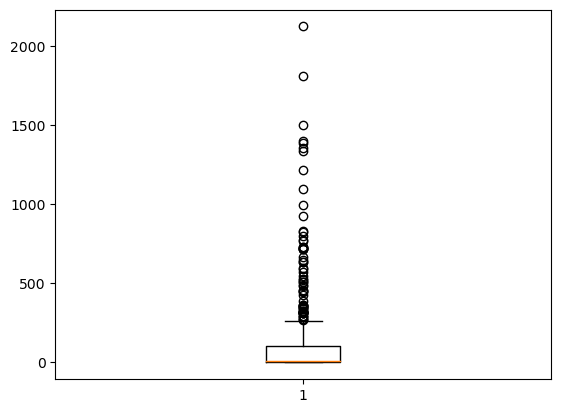

In [11]:
plt.boxplot(data[data['Class']==1].Amount)
plt.show()

In [12]:
#shows there are many outliers as amount column is highly skewed
#so fit data using scaler
from sklearn.preprocessing import StandardScaler
data['Amount']=StandardScaler().fit_transform(pd.DataFrame(data['Amount']))
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


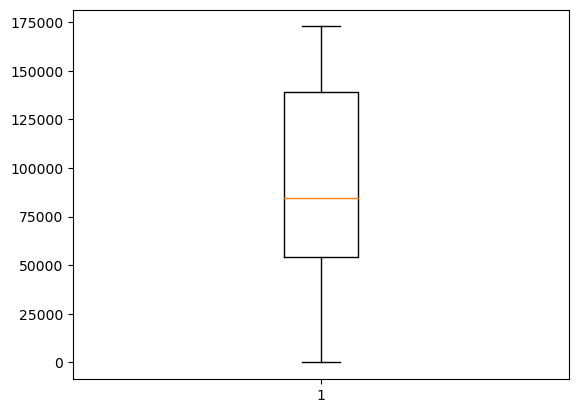

In [13]:
#time has no outliers but is skewed compared to other columns
plt.boxplot(data[data['Class']==0].Time)
plt.show()

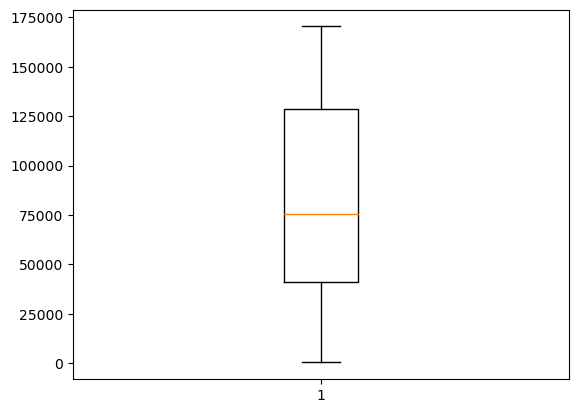

In [14]:
plt.boxplot(data[data['Class']==1].Time)
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
data['Time']=StandardScaler().fit_transform(pd.DataFrame(data['Time']))
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [16]:
#check for duplicates
data.duplicated().any()

True

In [17]:
data=data.drop_duplicates() #drop whatever duplicates present

In [18]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [19]:
#how ml performs without handling imbalanced data
#independent variable X:features
#dependent variable Y: target

X=data.drop('Class',axis=1)
Y=data['Class']
print(X,Y)

            Time         V1         V2        V3        V4        V5  \
0      -1.996583  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1      -1.996583   1.191857   0.266151  0.166480  0.448154  0.060018   
2      -1.996562  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3      -1.996562  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4      -1.996541  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  1.641931 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  1.641952  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  1.641974   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  1.641974  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  1.642058  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [20]:
#split into training and test data
from sklearn.model_selection import train_test_split
#train:80% data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [21]:
#apply ml algorithm directly:all classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,confusion_matrix,classification_report

In [22]:
CF={
    "Logistic Regression":LogisticRegression(),
    "Random Forest ":RandomForestClassifier(),
    "Decision Tree":DecisionTreeClassifier()
}

for key,cf in CF.items():
    print(key,":")
    cf.fit(X_train,Y_train)
    y_pred=cf.predict(X_test)
    #check metrics evaluation
    print("Accuracy:",accuracy_score(y_pred,Y_test))
    print("Precision:",precision_score(y_pred,Y_test))
    print("Recall score",recall_score(y_pred,Y_test))
    print("F1 score",f1_score(y_pred,Y_test))

Logistic Regression :
Accuracy: 0.9991541254009093
Precision: 0.5333333333333333
Recall score 0.8888888888888888
F1 score 0.6666666666666667
Random Forest  :
Accuracy: 0.9995418179254926
Precision: 0.7222222222222222
Recall score 0.9848484848484849
F1 score 0.8333333333333333
Decision Tree :
Accuracy: 0.9990836358509851
Precision: 0.7444444444444445
Recall score 0.6979166666666666
F1 score 0.7204301075268819


In [23]:

conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[56627    29]
 [   23    67]]


In [24]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.70      0.74      0.72        90

    accuracy                           1.00     56746
   macro avg       0.85      0.87      0.86     56746
weighted avg       1.00      1.00      1.00     56746



In [25]:
#above all scores except accuracy is bad for all models because of the high data difference in both the classes
#to improve all scores, balance data by under/over sampling
#take a sample of 473 data points for legit data
legit=data[data['Class']==0]
print(legit.shape)
fraud=data[data['Class']==1]
fraud.shape

(283253, 31)


(473, 31)

In [26]:
legit_s=legit.sample(n=473)
legit_s.shape

(473, 31)

In [27]:
new_df=pd.concat([legit_s,fraud],ignore_index=1)
new_df.shape

#calculate evaluation metrics again

(946, 31)

In [28]:
X=new_df.drop('Class',axis=1)
Y=new_df['Class']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
CF={
    "Logistic Regression":LogisticRegression(),
    "Random Forest ":RandomForestClassifier(),
    "Decision Tree":DecisionTreeClassifier()
}

for key,cf in CF.items():
    print(key,":")
    cf.fit(X_train,Y_train)
    y_pred=cf.predict(X_test)
    #check metrics evaluation
    print("Accuracy:",accuracy_score(y_pred,Y_test))
    print("Precision:",precision_score(y_pred,Y_test))
    print("Recall score",recall_score(y_pred,Y_test))
    print("F1 score",f1_score(y_pred,Y_test))

Logistic Regression :
Accuracy: 0.9473684210526315
Precision: 0.9117647058823529
Recall score 0.9893617021276596
F1 score 0.9489795918367346
Random Forest  :
Accuracy: 0.9263157894736842
Precision: 0.9019607843137255
Recall score 0.9583333333333334
F1 score 0.9292929292929293
Decision Tree :
Accuracy: 0.9157894736842105
Precision: 0.8921568627450981
Recall score 0.9479166666666666
F1 score 0.9191919191919192


In [29]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print(classification_report(Y_test, y_pred))
#scores increased but not perfect bcs of undersampling, data is lost so try oversampling:


Confusion Matrix:
[[83  5]
 [11 91]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        88
           1       0.95      0.89      0.92       102

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190



In [30]:
#oversampling using resampling smote:
X=data.drop('Class',axis=1)
Y=data['Class']
print(X.shape,Y.shape)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

(283726, 30) (283726,)


In [31]:
from imblearn.over_sampling import SMOTE
X_resample,Y_resample=SMOTE().fit_resample(X,Y)
print(X_resample.shape,Y_resample.shape)
Y_resample.value_counts()

(566506, 30) (566506,)


0    283253
1    283253
Name: Class, dtype: int64

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X_resample,Y_resample,test_size=0.2,random_state=42)
CF={
    "Logistic Regression":LogisticRegression(),
    "Random Forest ":RandomForestClassifier(),
    "Decision Tree":DecisionTreeClassifier()
}

for key,cf in CF.items():
    print(key,":")
    cf.fit(X_train,Y_train)
    y_pred=cf.predict(X_test)
    #check metrics evaluation
    print("Accuracy:",accuracy_score(y_pred,Y_test))
    print("Precision:",precision_score(y_pred,Y_test))
    print("Recall score",recall_score(y_pred,Y_test))
    print("F1 score",f1_score(y_pred,Y_test))

Logistic Regression :
Accuracy: 0.9461351079416074
Precision: 0.9182075687468112
Recall score 0.9728953843859518
F1 score 0.9447607324203724
Random Forest  :
Accuracy: 0.999894088365607
Precision: 1.0
Recall score 0.9997889219186997
F1 score 0.9998944498196851
Decision Tree :
Accuracy: 0.9984554553317682
Precision: 0.9991379158676261
Recall score 0.997786211258697
F1 score 0.9984616060832491


In [33]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print(classification_report(Y_test, y_pred))
#over sampling has a higher evaluation score so we'll consider that

Confusion Matrix:
[[56337   126]
 [   49 56790]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



In [34]:
#Random forest is the most accurate so we'll load that onto a file and use it for prediction
rf=RandomForestClassifier()
rf.fit(X_resample,Y_resample)

RandomForestClassifier()

In [35]:
import pickle
with open('rf.pkl', 'wb') as file:
    pickle.dump(rf, file)
with open('rf.pkl', 'rb') as file:
    load_model=pickle.load(file)
    
input_data = np.array([0, -1.3598071336738, -0.0727811733098497, 2.53634673796914, 1.37815522427443, 
                       -0.338320769942518, 0.462387777762292, 0.239598554061257, 0.0986979012610507, 
                       0.363786969611213, 0.0907941719789316, -0.551599533260813, -0.617800855762348, 
                       -0.991389847235408, -0.311169353699879, 1.46817697209427, -0.470400525259478, 
                       0.207971241929242, 0.0257905801985591, 0.403992960255733, 0.251412098239705, 
                       -0.018306777944153, 0.277837575558899, -0.110473910188767, 0.0669280749146731, 
                       0.128539358273528, -0.189114843888824, 0.133558376740387, -0.0210530534538215, 
                       149.62]).reshape(1, -1)

# Make predictions using the loaded model
y_pred = load_model.predict(input_data)

C:\Users\srika\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [36]:
if y_pred[0]==0:
    print("Legit")
else:
    print("fraud")

Legit
